In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import tqdm.notebook as tqdm

import scipy
import networkx as nx

### Load the Dataset

In [40]:
!ls ../../dataset/

 dataset.csv  'Variable Names (1).xlsx'


In [41]:
df = pd.read_csv("../../dataset/dataset.csv", index_col = [0]).reset_index(drop = True)
df


,ID,CTFLAG,ANYFX,FRAX_SCORE,PARKINS,RHEUMAT,OSTEOPOR,ARTHRIT,CANC_F30,CATARACT,...,F60VITA,TEXPWK,WALKSPD,BKBONE,BKHIP,BKBACK,BKLARM,SMOKING,YEARS_MENOPAUSE,DUR_MENA_MENO
0,131073,1,0,6.14,0.0,0.0,0.0,0.0,0.0,0.0,...,975.84083,2.50000,3.0,1.0,0.0,0.0,1.0,1.0,10.0,-45.0
1,262147,1,0,8.05,0.0,8.0,0.0,1.0,0.0,0.0,...,848.40762,26.83333,3.0,0.0,0.0,0.0,0.0,1.0,13.0,-44.0
2,131075,0,0,12.88,0.0,8.0,0.0,1.0,0.0,1.0,...,629.72861,21.00000,3.0,1.0,0.0,0.0,0.0,1.0,11.0,-45.0
3,262149,0,0,8.78,0.0,8.0,0.0,1.0,0.0,0.0,...,339.14853,32.83333,4.0,0.0,0.0,0.0,0.0,1.0,15.0,-45.0
4,262150,1,1,1.73,0.0,0.0,0.0,0.0,0.0,0.0,...,1574.51101,21.83333,3.0,0.0,0.0,0.0,0.0,0.0,19.0,-30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74199,262130,1,0,3.07,0.0,0.0,0.0,0.0,0.0,0.0,...,668.50414,0.00000,3.0,1.0,0.0,0.0,0.0,0.0,2.0,-46.0
74200,131066,1,0,3.94,0.0,0.0,0.0,0.0,0.0,0.0,...,334.67271,7.50000,3.0,0.0,0.0,0.0,0.0,0.0,7.0,-46.0
74201,262131,0,0,4.45,0.0,0.0,0.0,0.0,0.0,0.0,...,1195.77043,17.08333,3.0,0.0,0.0,0.0,0.0,1.0,1.0,-47.0
74202,131068,1,0,8.54,0.0,0.0,0.0,0.0,0.0,0.0,...,1169.27512,0.00000,9.0,1.0,0.0,0.0,0.0,0.0,13.0,-45.0


In [42]:
#extract cohort, labels, patid
df = df[df["CTFLAG"] == 1]

#do not drop frax score yet
labels = df["ANYFX"]
dataset = df.drop(columns = ["ANYFX", "CTFLAG", "ID"]).reset_index(drop = True)

print("Dataset Shape:", df.shape)

Dataset Shape: (31470, 67)


In [43]:
dataset

,FRAX_SCORE,PARKINS,RHEUMAT,OSTEOPOR,ARTHRIT,CANC_F30,CATARACT,DIARRHEA,ASTHMA,EMPHYSEM,...,F60VITA,TEXPWK,WALKSPD,BKBONE,BKHIP,BKBACK,BKLARM,SMOKING,YEARS_MENOPAUSE,DUR_MENA_MENO
0,6.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,975.84083,2.50000,3.0,1.0,0.0,0.0,1.0,1.0,10.0,-45.0
1,8.05,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,848.40762,26.83333,3.0,0.0,0.0,0.0,0.0,1.0,13.0,-44.0
2,1.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1574.51101,21.83333,3.0,0.0,0.0,0.0,0.0,0.0,19.0,-30.0
3,5.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1343.93763,8.75000,3.0,0.0,0.0,0.0,0.0,1.0,16.0,-36.0
4,6.90,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,666.84562,11.12500,3.0,0.0,0.0,0.0,0.0,1.0,16.0,-44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31465,4.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,649.35222,4.50000,3.0,1.0,0.0,0.0,0.0,0.0,4.0,-43.0
31466,3.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,668.50414,0.00000,3.0,1.0,0.0,0.0,0.0,0.0,2.0,-46.0
31467,3.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334.67271,7.50000,3.0,0.0,0.0,0.0,0.0,0.0,7.0,-46.0
31468,8.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1169.27512,0.00000,9.0,1.0,0.0,0.0,0.0,0.0,13.0,-45.0


### Similarity Network

In [44]:
import torch 
import torch_geometric as pyg

In [45]:
feature_matrix = dataset.drop(columns = ["FRAX_SCORE"]).to_numpy().astype(np.float32)

In [46]:
from sklearn.neighbors import NearestNeighbors
import numpy as np


feature_matrix_np = feature_matrix.astype(np.float32)

k = 800 

# Create the K-NN model
knn = NearestNeighbors(n_neighbors=k, metric='euclidean') 
knn.fit(feature_matrix_np)

# Get the nearest neighbors for each sample
distances, indices = knn.kneighbors(feature_matrix_np)

# Create the edge index and weights
edge_index = torch.tensor([np.repeat(np.arange(feature_matrix_np.shape[0]), k), indices.flatten()])
edge_weight = torch.tensor(distances.flatten())

print(f"Edge Index Shape: {edge_index.shape}")
print(f"Edge Weight Shape: {edge_weight.shape}")

print("\tedges:", edge_index.shape[1])
print("\t(min edge, max edge): (%s, %s)" % (edge_weight.min().numpy(), edge_weight.max().numpy()))
print("\t(avg, std): (%s, %s)" % (edge_weight.mean(), edge_weight.var()))


Edge Index Shape: torch.Size([2, 25176000])
Edge Weight Shape: torch.Size([25176000])
	edges: 25176000
	(min edge, max edge): (0.0, 14073.76953125)
	(avg, std): (tensor(242.2839, dtype=torch.float64), tensor(90060.1730, dtype=torch.float64))


In [47]:
new_edge_weight = (edge_weight - edge_weight.min()) / (edge_weight.max() - edge_weight.min())
new_edge_index, new_edge_weight = pyg.utils.remove_self_loops(edge_index, new_edge_weight)
print("\t(min edge, max edge): (%s, %s)" % (new_edge_weight.min().numpy(), new_edge_weight.max().numpy()))
print("\t(avg, std): (%s, %s)" % (new_edge_weight.mean(), new_edge_weight.var()))


	(min edge, max edge): (0.0008923771711333417, 1.0)
	(avg, std): (tensor(0.0172, dtype=torch.float64), tensor(0.0005, dtype=torch.float64))


In [48]:
#remove self edges
edge_index, edge_weight = pyg.utils.remove_self_loops(edge_index, edge_weight)

In [49]:
import torch
from torch_geometric.utils import degree

# Compute the top-k edges
threshold = 0.3
topk = int(threshold * len(edge_weight))

topk_indices = torch.topk(edge_weight, topk, largest=True).indices
pruned_edge_index = edge_index[:, topk_indices]
pruned_edge_weight = edge_weight[topk_indices]

# Identify missing nodes
present_nodes = torch.unique(pruned_edge_index)
all_nodes = torch.arange(edge_index.max() + 1)  # Assuming contiguous indices
missing_nodes = all_nodes[~torch.isin(all_nodes, present_nodes)]

print("Missing Nodes:", missing_nodes.shape)
if missing_nodes.numel() > 0:
    # Create a mask for edges containing missing nodes
    mask = torch.isin(edge_index[0], missing_nodes) | torch.isin(edge_index[1], missing_nodes)

    # Extract candidate edges and weights
    candidate_edges = edge_index[:, mask]
    candidate_weights = edge_weight[mask]
    
    print("adding nodes")
    # Find the best edge for each missing node (highest weight)
    node_indices = candidate_edges[0]  # Nodes appearing in candidate edges
    best_edge_indices = torch.argmax(candidate_weights)  # Select strongest connection
    chosen_edges = candidate_edges[:, best_edge_indices].unsqueeze(1)
    chosen_weights = candidate_weights[best_edge_indices].unsqueeze(0)

    # Append selected edges to pruned graph
    pruned_edge_index = torch.cat([pruned_edge_index, chosen_edges], dim=1)
    pruned_edge_weight = torch.cat([pruned_edge_weight, chosen_weights])

# Final pruned graph
edge_index = pruned_edge_index
edge_weight = pruned_edge_weight


Missing Nodes: torch.Size([3001])
adding nodes


Text(0.5, 1.0, 'Distribution of all Edges')

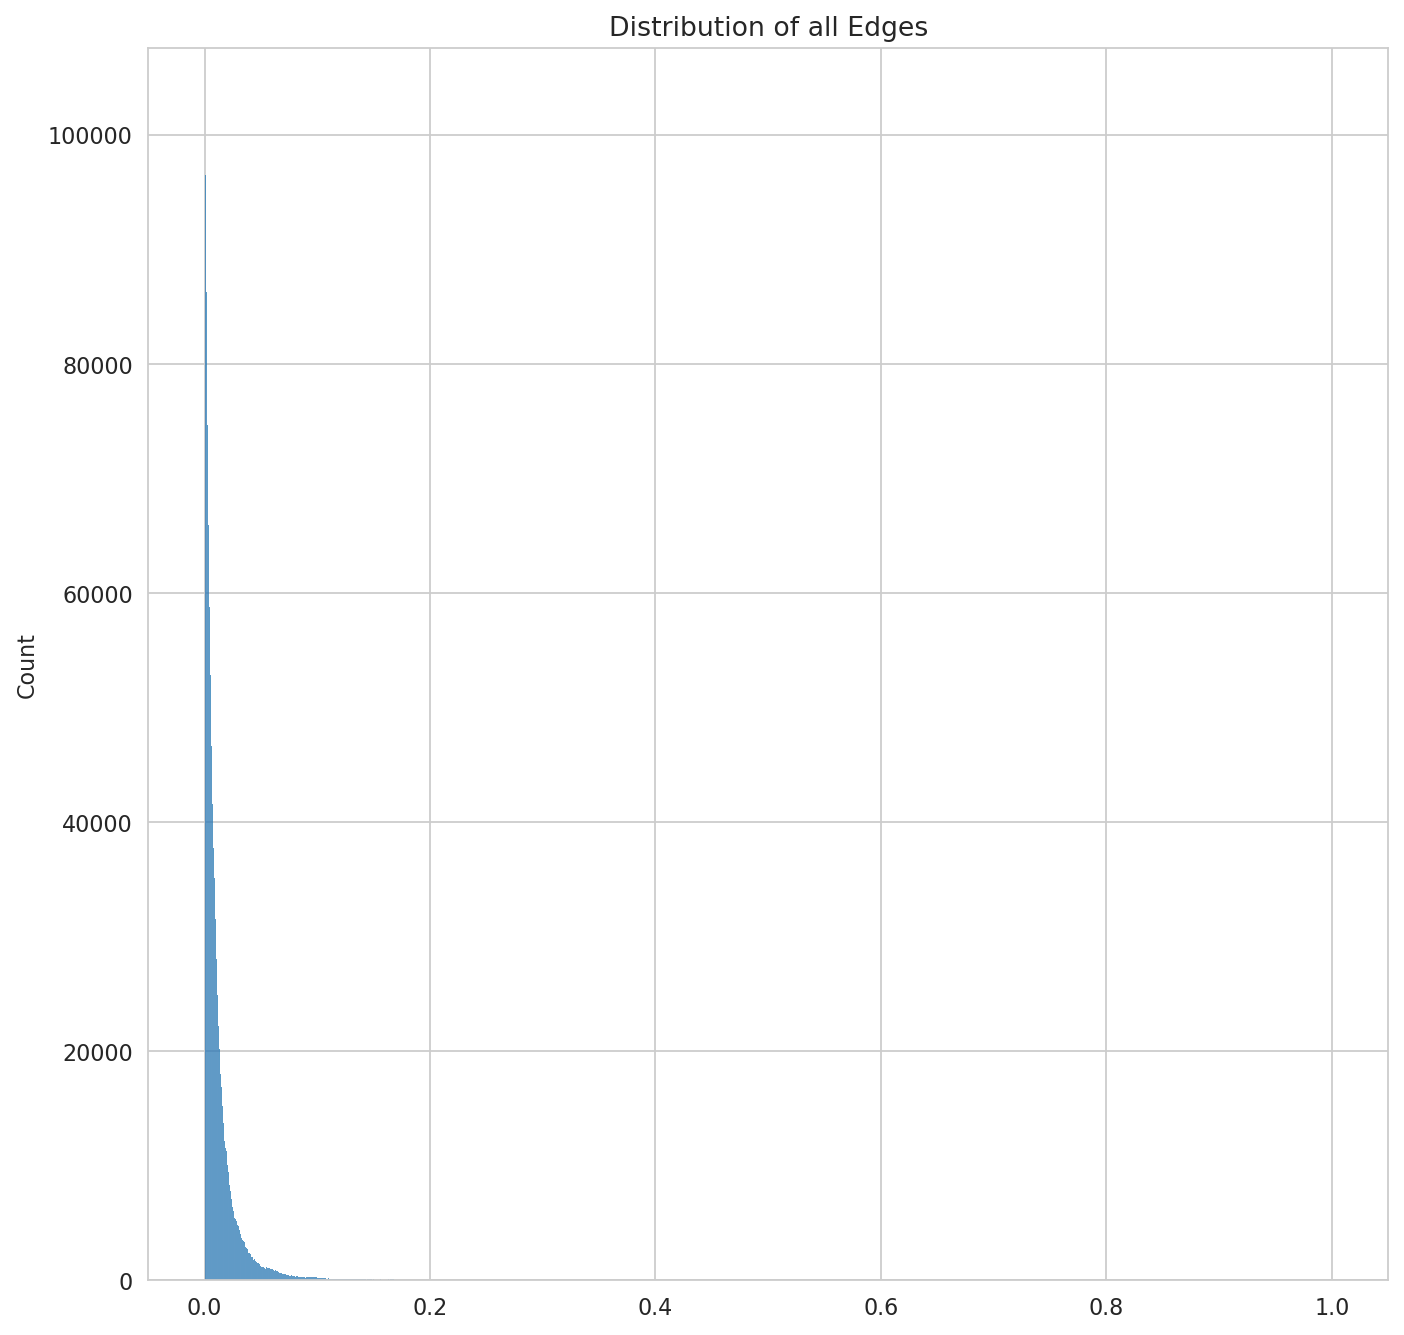

In [50]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10), dpi=160)
#scale between 0 and 1
edge_weight = (edge_weight - edge_weight.min()) / (edge_weight.max() - edge_weight.min())
sns.histplot(edge_weight)
plt.title("Distribution of all Edges")

In [51]:
edge_weight, edge_index = edge_weight.to(torch.float64), edge_index.to(torch.long)
pyg_g = pyg.data.Data(edge_index = edge_index, edge_weight = edge_weight)

#remove the frax score before putting it in the graph - features are ready to run on 
#standard scaler
from sklearn.preprocessing import StandardScaler as sc
hi = sc()
x = hi.fit_transform(dataset.drop(columns = ["FRAX_SCORE"]).to_numpy())

pyg_g.x = torch.tensor(x, dtype = torch.float32)
pyg_g.num_nodes = dataset.shape[0]
pyg_g.y = torch.tensor(labels.to_numpy(), dtype = torch.float32)

In [52]:
print("Similarity Network Statistics:")
print("\tnodes:", pyg_g.num_nodes)
print("\tedges:", edge_index.shape[1])
print("\t(min edge, max edge): (%s, %s)" % (edge_weight.min().numpy(), edge_weight.max().numpy()))
print("\t(avg, std): (%s, %s)" % (edge_weight.mean(), edge_weight.var()))

Similarity Network Statistics:
	nodes: 31470
	edges: 7543360
	(min edge, max edge): (0.0, 1.0)
	(avg, std): (tensor(0.0145, dtype=torch.float64), tensor(0.0012, dtype=torch.float64))


In [53]:
dataset.drop(columns = ["FRAX_SCORE"]).to_numpy().shape

(31470, 63)

### Plotting Graph

take 50 nodes that are class 0 that are connected to 50 nodes in class 1

Step 1: Find intra-class edges (same class connections)
Step 2: Find inter-class edges (cross-class connections)
Step 3: Select nodes that satisfy both intra- and inter-class connectivity
Step 4: Filter edges to include only selected nodes
plotting


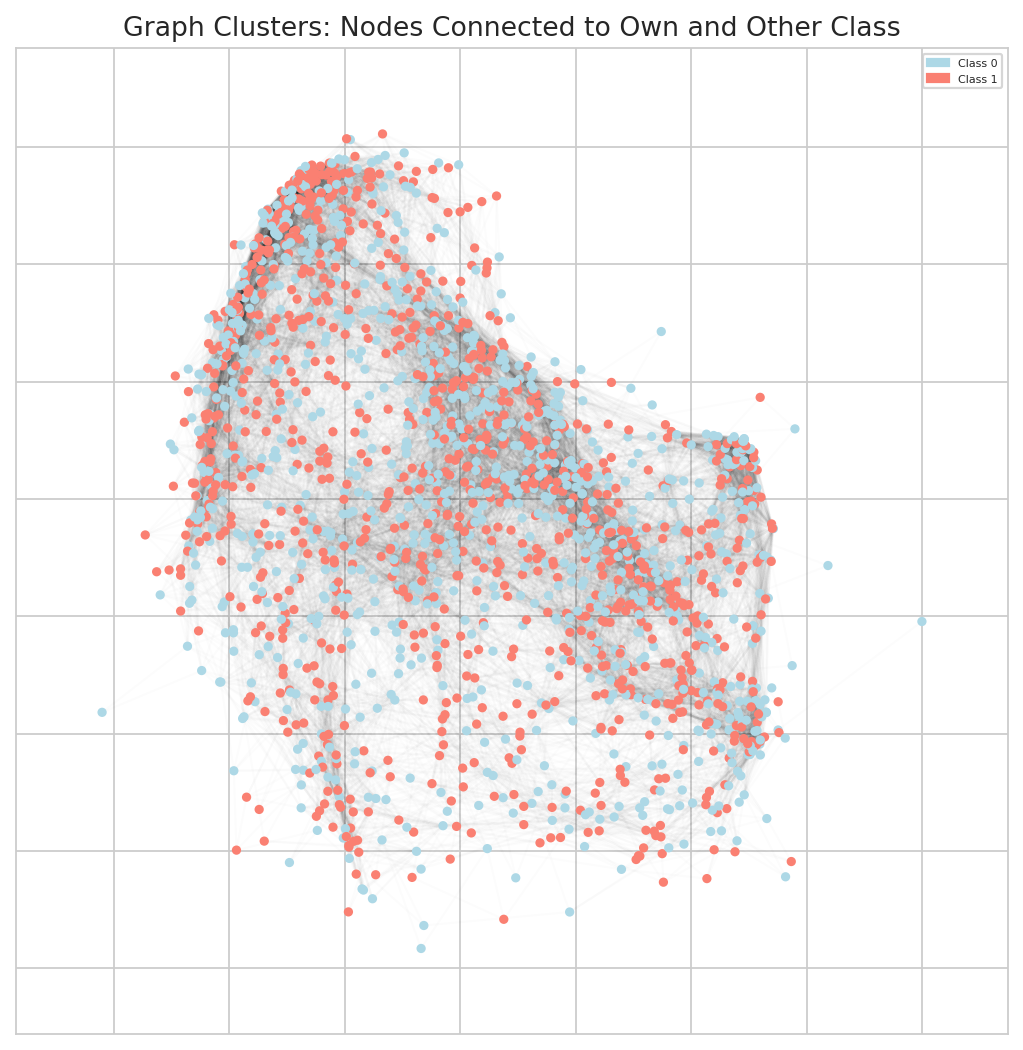

In [38]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import matplotlib.patches as mpatches

data = pyg_g
num_nodes = 1000  # Number of nodes per class to select

# Extract class labels
class_0_mask = (data.y == 0)
class_1_mask = (data.y == 1)

# Get node indices for each class
class_0_nodes = torch.where(class_0_mask)[0].tolist()
class_1_nodes = torch.where(class_1_mask)[0].tolist()

# Convert edge_index to NumPy for faster filtering
edges_np = data.edge_index.numpy().T  # Shape: (num_edges, 2)

# Convert class indices to sets for fast lookup
class_0_set = set(class_0_nodes)
class_1_set = set(class_1_nodes)

print("Step 1: Find intra-class edges (same class connections)")
intra_class_edges_0 = {src for src, tgt in edges_np if src in class_0_set and tgt in class_0_set}
intra_class_edges_1 = {src for src, tgt in edges_np if src in class_1_set and tgt in class_1_set}

print("Step 2: Find inter-class edges (cross-class connections)")
inter_class_edges_0 = {src for src, tgt in edges_np if src in class_0_set and tgt in class_1_set}
inter_class_edges_1 = {src for src, tgt in edges_np if src in class_1_set and tgt in class_0_set}

print("Step 3: Select nodes that satisfy both intra- and inter-class connectivity")
valid_class_0 = list(intra_class_edges_0 & inter_class_edges_0)[:num_nodes]
valid_class_1 = list(intra_class_edges_1 & inter_class_edges_1)[:num_nodes]

# Convert selected nodes to sets
selected_class_0 = set(valid_class_0)
selected_class_1 = set(valid_class_1)

print("Step 4: Filter edges to include only selected nodes")
# Convert selected nodes into a single NumPy array for fast vectorized operations
selected_nodes = np.array(list(selected_class_0 | selected_class_1))

# Use NumPy's `isin` for fast membership checking
mask_src = np.isin(edges_np[:, 0], selected_nodes)  # Check if src is in selected nodes
mask_tgt = np.isin(edges_np[:, 1], selected_nodes)  # Check if tgt is in selected nodes

# Keep only edges where both src and tgt are in the selected nodes
filtered_edges = edges_np[mask_src & mask_tgt]  # Faster filtering

# Convert back to list (if needed for NetworkX)
selected_edges = filtered_edges.tolist()

print("plotting")
# Create NetworkX graph
G = nx.Graph()
G.add_edges_from(selected_edges)

# Compute positions for visualization
pos = nx.spring_layout(G, seed=42) 


# Define colors
color_class_0 = "lightblue"
color_class_1 = "salmon"

# Assign node colors based on class
node_colors = [color_class_0 if node in selected_class_0 else color_class_1 for node in G.nodes]

# Draw nodes and edges
plt.figure(figsize=(8, 8), dpi=160)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.01)

# Create legend handles
legend_patches = [
    mpatches.Patch(color=color_class_0, label="Class 0"),
    mpatches.Patch(color=color_class_1, label="Class 1")
]

# Add legend
plt.legend(handles=legend_patches, loc="upper right", fontsize=5)
plt.title("Graph Clusters: Nodes Connected to Own and Other Class")
plt.show()


### Training Loop

In [54]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve

def FRAX_maximize_youden_j(y_true: pd.Series, y_prob: pd.Series) -> float:
    """
    Finds the optimal threshold that maximizes Youden’s J Statistic (TPR - FPR).

    :param y_true: Pandas Series of true binary labels (0 or 1).
    :param y_prob: Pandas Series of predicted probabilities.
    :return: The optimal threshold for classification.
    """
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    # Compute Youden’s J statistic
    j_scores = tpr - fpr

    # Find the optimal threshold (maximum J score)
    best_threshold = thresholds[np.argmax(j_scores)]

    print(f"Optimal Threshold (Max Youden's J): {best_threshold:.4f}")

    return best_threshold



In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

import pandas as pd
import numpy as np

def weighted_downsample(X: pd.DataFrame, 
                        y: pd.Series, 
                        feature_list: list = ["ETHNICNIH", "RACENIH"],
                        weights_dict: dict = None, 
                        frac: float = 0.5, 
                        random_state: int = 42):

    valid_features = [f for f in feature_list if f in X.columns]
    if not valid_features:
        raise ValueError("None of the specified features exist in X.")

    #no weights_dict is provided
    if weights_dict is None:
        weights_dict = {feature: 1 / len(valid_features) for feature in valid_features}

    total_weight = sum(weights_dict.values())
    normalized_weights = {k: v / total_weight for k, v in weights_dict.items() if k in valid_features}
    sampling_weights = X[valid_features].mul(normalized_weights).sum(axis=1)
    sampling_weights = np.maximum(sampling_weights, 1e-10)  # Avoid zero probability
    sampling_weights /= sampling_weights.sum()
    downsampled_indices = (
        pd.concat([X, y], axis=1) 
        .groupby(y.name, group_keys=False)  
        .apply(lambda group: group.sample(frac=frac, weights=sampling_weights.loc[group.index], random_state=random_state))
        .index
    )

    X_downsampled = X.loc[downsampled_indices]
    y_downsampled = y.loc[downsampled_indices]

    return X_downsampled, y_downsampled


def weighted_downsample_LABELS(df, labels, target_ratio=0.5, random_state=42):
    """
    Performs weighted downsampling to balance classes in the dataset.

    :param df: DataFrame with features.
    :param labels: Series with target labels.
    :param target_ratio: Desired ratio of the minority class.
    :param random_state: Random seed for reproducibility.
    :return: Downsampled features (X) and labels (y).
    """
    # Combine features and labels into one DataFrame
    df['label'] = labels
    
    # Identify majority and minority classes
    class_counts = df['label'].value_counts()
    min_class = class_counts.idxmin()
    maj_class = class_counts.idxmax()

    # Compute the target number of samples for the majority class
    n_min = class_counts[min_class]
    n_maj = int(n_min / target_ratio - n_min)

    # Get indices of the minority and majority class
    minority_indices = df[df['label'] == min_class].index
    majority_indices = df[df['label'] == maj_class].index

    # Downsample the majority class while keeping track of indices
    df_majority_downsampled = resample(df.loc[majority_indices], 
                                       replace=False, 
                                       n_samples=n_maj, 
                                       random_state=random_state)

    # Combine the balanced dataset
    df_balanced = pd.concat([df.loc[minority_indices], df_majority_downsampled])

    # Separate features, labels, and indices
    y_balanced = df_balanced['label']
    X_balanced = df_balanced.drop(columns=['label'])
    selected_indices = df_balanced.index.to_list()  # Convert indices to a list

    return X_balanced, y_balanced, selected_indices




In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

def evaluate_model(y_true, y_pred, y_prob=None, descr = None):
    """
    Computes and prints standard classification metrics: Accuracy, AUC, Precision, Recall, and F1-score.

    :param y_true: List or array of true labels (0 or 1).
    :param y_pred: List or array of predicted labels (0 or 1).
    :param y_prob: List or array of predicted probabilities (optional, needed for AUC).
    :return: Dictionary containing Accuracy, AUC, Precision, Recall, and F1-score.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)


    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-score": f1_score(y_true, y_pred, zero_division=0),
        "AUC": roc_auc_score(y_true, y_prob), 
        "Specificity": specificity 
    }

    # Print metrics
    if descr:
        print(descr)
    for key, value in metrics.items():
        print(f"\t{key}: {value:.4f}" if value is not None else f"{key}: N/A (Only one class present)")

    return metrics

    
    #extract featuresd
    y_pred = model.predict(X_train_balanced)
    y_prob = model.predict_proba(X_train_balanced)[:, 1]

def eval_run(model, x, y, descr = None):
    y_pred = model.predict(x)
    y_prob = model.predict_proba(x)[:, 1]
    evaluate_model(y, y_pred, y_prob, descr = descr)

def eval_frax(frax_scores, labels, descr = None, threshold = None):
    if threshold:
        pass
    else:
        threshold = FRAX_maximize_youden_j(labels, frax_scores)
    y_pred = (frax_scores >= threshold).astype(int)
    evaluate_model(labels, y_pred, frax_scores, descr = descr)
    return threshold



In [57]:
random_cv_avail = True

import scipy

param_dist = {
    'n_estimators': scipy.stats.randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': scipy.stats.randint(2, 20),
    'min_samples_leaf': scipy.stats.randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

In [58]:
edge_index[0].max()

tensor(31469)

In [59]:
dataset.to_numpy().shape

(31470, 64)

### Defining the Model

In [60]:
!nvidia-smi

Tue Mar 11 05:42:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     On  |   00000000:85:00.0 Off |                    0 |
|  0%   39C    P0             77W /  300W |    4095MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [61]:
import torch
import torch.nn as nn

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction="mean"):
        """
        Implements Focal Loss for binary classification.
        Args:
            alpha (float): Balancing factor for class weights.
            gamma (float): Focusing parameter for hard examples.
            reduction (str): 'mean' (default) or 'sum'.
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.bce_loss = nn.BCEWithLogitsLoss(reduction="none")  # Keep raw loss for focal scaling

    def forward(self, logits, targets):
        """
        Args:
            logits: Raw model outputs (before sigmoid).
            targets: Ground truth labels (binary, 0 or 1).
        Returns:
            Focal Loss value.
        """
        bce_loss = self.bce_loss(logits, targets)  # Compute standard BCE loss
        probs = torch.sigmoid(logits)  # Convert logits to probabilities
        targets = targets.float()

        # Compute focal loss scaling factor
        p_t = targets * probs + (1 - targets) * (1 - probs)
        focal_factor = (1 - p_t) ** self.gamma

        # Apply alpha weighting (for class balance)
        alpha_factor = targets * self.alpha + (1 - targets) * (1 - self.alpha)

        # Compute final focal loss
        loss = alpha_factor * focal_factor * bce_loss

        if self.reduction == "mean":
            return loss.mean()
        elif self.reduction == "sum":
            return loss.sum()
        else:
            return loss  # No reduction (per-sample loss)

In [62]:
import torch
import torch_geometric as pyg

print(torch.cuda.is_available())
print([torch.cuda.device(i) for i in range(torch.cuda.device_count())])

True


In [63]:
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, num_layers, num_heads, node_features=63, hidden_channels=50, out_channels=1):
        super(GAT, self).__init__()

        self.num_layers = num_layers  
        self.module_list = torch.nn.ModuleList()

        # Input layer
        self.in_layer = GATConv(in_channels=node_features, 
                                out_channels=hidden_channels, 
                                heads=num_heads, 
                                concat=True)

        # Hidden layers
        for _ in range(num_layers):
            self.module_list.append(GATConv(in_channels=hidden_channels * num_heads, 
                                            out_channels=hidden_channels, 
                                            heads=num_heads, 
                                            concat=True))


        self.out_layer = Linear(hidden_channels * num_heads, out_channels)

    def forward(self, x, edge_index, edge_weight):
    
        x = self.in_layer(x, edge_index, edge_attr = edge_weight)
        x = F.relu(x)  

        for layer in self.module_list:
            x = layer(x, edge_index, edge_attr = edge_weight)
        

        x = self.out_layer(x)
        return x
    

import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_layers, node_features=63, hidden_channels=50, out_channels=1):
        super(GCN, self).__init__()

        self.num_layers = num_layers  
        self.module_list = torch.nn.ModuleList()

        # Input layer
        self.in_layer = GCNConv(in_channels=node_features, out_channels=hidden_channels)

        # Hidden layers
        for _ in range(num_layers):
            self.module_list.append(GCNConv(in_channels=hidden_channels, out_channels=hidden_channels))

        # Output layer
        self.out_layer = Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_weight=None):
        x = self.in_layer(x, edge_index, edge_weight)
        x = F.relu(x)  

        for layer in self.module_list:
            x = layer(x, edge_index, edge_weight)
            x = F.relu(x)  # Apply ReLU activation after each layer
        
        x = self.out_layer(x)
        return x

    
import torch
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.nn import SAGEConv

class GraphSAGE(torch.nn.Module):
    def __init__(self, num_layers, node_features=63, hidden_channels=50, out_channels=1, aggr="mean"):
        super(GraphSAGE, self).__init__()

        self.num_layers = num_layers  
        self.module_list = torch.nn.ModuleList()

        # Input layer
        self.in_layer = SAGEConv(in_channels=node_features, out_channels=hidden_channels, aggr=aggr)

        # Hidden layers
        for _ in range(num_layers):
            self.module_list.append(SAGEConv(in_channels=hidden_channels, out_channels=hidden_channels, aggr=aggr))

        # Output layer
        self.out_layer = Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_weight=None):
        x = self.in_layer(x, edge_index)
        x = F.relu(x)  

        for layer in self.module_list:
            x = layer(x, edge_index)
            x = F.relu(x)  # Apply ReLU activation after each layer
        
        x = self.out_layer(x)
        return x






In [64]:
import torch.optim as optim

device = torch.device("cuda:0")

pyg_g.edge_index = pyg_g.edge_index.to(device)
pyg_g.edge_weight = pyg_g.edge_weight.to(device)
pyg_g.x = pyg_g.x.to(torch.float64).to(device)
pyg_g.y = pyg_g.y.to(torch.float64).to(device)

In [65]:
print(f"x dtype: {pyg_g.x.dtype}, shape: {pyg_g.x.shape}, device: {pyg_g.x.device}")
print(f"edge_index dtype: {pyg_g.edge_index.dtype}, shape: {pyg_g.edge_index.shape}, device: {pyg_g.edge_index.device}")
if edge_weight is not None:
    print(f"edge_weight dtype: {pyg_g.edge_weight.dtype}, shape: {pyg_g.edge_weight.shape}, device: {pyg_g.edge_weight.device}")
else:
    print("edge_weight is None")


x dtype: torch.float64, shape: torch.Size([31470, 63]), device: cuda:0
edge_index dtype: torch.int64, shape: torch.Size([2, 7543360]), device: cuda:0
edge_weight dtype: torch.float64, shape: torch.Size([7543360]), device: cuda:0


In [66]:
pyg_g

Data(edge_index=[2, 7543360], edge_weight=[7543360], x=[31470, 63], num_nodes=31470, y=[31470])

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from torch_geometric.loader import NeighborLoader

from tqdm.notebook import tqdm

n_splits = 5
random_state = 45
target_ratio=0.5
epoch_num = 50
#lr = 0.0001
lr = 0.01

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
scores = []


#model list for 5fold cv, 3 layer GAT with 4 attention heads each
#model_list = [GAT(num_layers = 4, num_heads = 2)for i in range(5)]
#model_list = [GCN(num_layers = 4)for i in range(5)]
model_list = [GraphSAGE(num_layers = 4) for i in range(5)]

for fold, (train_idx, test_idx) in enumerate(skf.split(dataset, labels)):
    
    model = model_list[fold].double().to(device)
    
    # Loss, Optimizer, Scheduler
    criterion = FocalLoss().to(device)  
    #optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay = 1e-4)
    optimizer = optim.AdamW(model.parameters(), lr = lr, weight_decay = 1e-4)
    #scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = epoch_num, eta_min = lr / 100)  
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)  

    
    print(f"---------------------------------Fold {fold+1}/{n_splits}---------------------------------")

    # Split train and test sets
    X_train, X_test = dataset.iloc[train_idx], dataset.iloc[test_idx]
    y_train, y_test = labels.iloc[train_idx], labels.iloc[test_idx]
    
    # Perform weighted downsampling on training data
    X_train_balanced, y_train_balanced, downsampled_indices = weighted_downsample_LABELS(X_train, y_train, target_ratio = 0.3)
    print("[TRAIN] Fold Label Distr:", dict(pd.Series(y_train_balanced).value_counts()))
    
    #get frax after downsample
    frax_score_train, frax_score_test = X_train_balanced["FRAX_SCORE"], X_test["FRAX_SCORE"]
    X_train_balanced, X_test = X_train_balanced.drop(columns = ["FRAX_SCORE"]), X_test.drop(columns = ["FRAX_SCORE"])
   
    #eval frax
    FRAX_threshold = eval_frax(frax_score_train, y_train_balanced, descr = "FRAX Train:")
    downsampled_indices = torch.tensor(downsampled_indices).to(torch.long)
    #########################################################
    #train model
    
    batch_size = 128  
    num_neighbors = [10, 5]  
    train_loader = NeighborLoader(
        pyg_g,
        input_nodes = downsampled_indices,  # Sample from train nodes
        num_neighbors = num_neighbors,
        batch_size = batch_size,
        shuffle = False
    )

    with tqdm(range(epoch_num), desc="TRAIN GNN") as pbar:
        train_probs = []
        train_y = []
        for epoch in pbar:
            model.train()
            total_loss = 0
            
            for batch in train_loader:  # Iterate over mini-batches
                optimizer.zero_grad()
                batch = batch.to(device)
                out = model(batch.x, batch.edge_index, batch.edge_weight)

                loss = criterion(out.squeeze(), batch.y)
                loss.backward()
                optimizer.step()

                total_loss += loss.item()
                
                if epoch == epoch_num - 1:
                    #track
                    train_probs.append(torch.sigmoid(out).squeeze().detach().cpu())
                    train_y.append(batch.y.cpu())
            
            scheduler.step()
            pbar.set_postfix({"Loss": f"{total_loss / len(train_loader):.4f}"})
            
    train_probs = torch.cat(train_probs, dim = 0)
    train_y = torch.cat(train_y, dim = 0)
    train_preds = (train_probs > 0.23)
    evaluate_model(train_y, train_preds, train_probs, descr = "GNN Train:")

    
    ###########################################################################
    
    # Step 1: Identify the complementary indices
    total_indices = torch.arange(pyg_g.num_nodes)  # Get all indices (from 0 to number of nodes)
    complementary_mask = ~torch.isin(total_indices, downsampled_indices)  # Mask for nodes not in downsampled_indices
    complementary_indices = total_indices[complementary_mask]  # Apply the mask to get complementary indices
    
    print("[TEST] Label Distr:", dict(pd.Series(labels.iloc[complementary_indices]).value_counts()))
    eval_frax(frax_score_test, y_test, descr = "FRAX Test:", threshold = FRAX_threshold)
    
    model.eval()
    test_probs = []
    test_y = []
    test_loader = NeighborLoader(
        pyg_g,
        input_nodes = complementary_mask,  # Sample from everything not in train
        num_neighbors = num_neighbors,
        batch_size = batch_size,
        shuffle = False)
    
    for batch in test_loader:  # Iterate over mini-batches
        batch = batch.to(device)
        out = model(batch.x, batch.edge_index, batch.edge_weight)
        test_probs.append(torch.sigmoid(out).squeeze().detach().cpu())
        test_y.append(batch.y.cpu())
    
    test_probs = torch.cat(test_probs, dim = 0)
    test_y = torch.cat(test_y, dim = 0)
    test_preds = (test_probs > 0.22)
    evaluate_model(test_y, test_preds, test_probs, descr = "GNN Test:")
    print("\n")


---------------------------------Fold 1/5---------------------------------
[TRAIN] Fold Label Distr: {0.0: 2291, 1.0: 982}
Optimal Threshold (Max Youden's J): 14.7000
FRAX Train:
	Accuracy: 0.6847
	Precision: 0.3596
	Recall: 0.0652
	F1-score: 0.1103
	AUC: 0.4909
	Specificity: 0.9502


TRAIN GNN:   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.8719
	Precision: 0.4793
	Recall: 0.9037
	F1-score: 0.6264
	AUC: 0.9587
	Specificity: 0.8676
[TEST] Label Distr: {0: 24938, 1: 3259}
FRAX Test:
	Accuracy: 0.8468
	Precision: 0.1857
	Recall: 0.0963
	F1-score: 0.1268
	AUC: 0.5695
	Specificity: 0.9449
GNN Test:
	Accuracy: 0.8573
	Precision: 0.4513
	Recall: 0.9060
	F1-score: 0.6025
	AUC: 0.9560
	Specificity: 0.8507


---------------------------------Fold 2/5---------------------------------
[TRAIN] Fold Label Distr: {0.0: 2179, 1.0: 934}
Optimal Threshold (Max Youden's J): 2.2400
FRAX Train:
	Accuracy: 0.3293
	Precision: 0.3028
	Recall: 0.9486
	F1-score: 0.4591
	AUC: 0.4921
	Specificity: 0.0638


TRAIN GNN:   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.9070
	Precision: 0.5717
	Recall: 0.8742
	F1-score: 0.6913
	AUC: 0.9631
	Specificity: 0.9115
[TEST] Label Distr: {0: 25112, 1: 3245}
FRAX Test:
	Accuracy: 0.1633
	Precision: 0.1197
	Recall: 0.9821
	F1-score: 0.2133
	AUC: 0.5753
	Specificity: 0.0564
GNN Test:
	Accuracy: 0.8918
	Precision: 0.5276
	Recall: 0.8894
	F1-score: 0.6623
	AUC: 0.9608
	Specificity: 0.8921


---------------------------------Fold 3/5---------------------------------
[TRAIN] Fold Label Distr: {0.0: 2366, 1.0: 1014}
Optimal Threshold (Max Youden's J): 7.2100
FRAX Train:
	Accuracy: 0.5760
	Precision: 0.3170
	Recall: 0.3580
	F1-score: 0.3363
	AUC: 0.5036
	Specificity: 0.6695


TRAIN GNN:   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.9164
	Precision: 0.6020
	Recall: 0.8829
	F1-score: 0.7159
	AUC: 0.9637
	Specificity: 0.9210
[TEST] Label Distr: {0: 24850, 1: 3240}
FRAX Test:
	Accuracy: 0.6441
	Precision: 0.1515
	Recall: 0.4525
	F1-score: 0.2271
	AUC: 0.5859
	Specificity: 0.6691
GNN Test:
	Accuracy: 0.9018
	Precision: 0.5548
	Recall: 0.8875
	F1-score: 0.6827
	AUC: 0.9613
	Specificity: 0.9038


---------------------------------Fold 4/5---------------------------------
[TRAIN] Fold Label Distr: {0.0: 2335, 1.0: 1001}
Optimal Threshold (Max Youden's J): 11.3200
FRAX Train:
	Accuracy: 0.6595
	Precision: 0.3300
	Recall: 0.1309
	F1-score: 0.1874
	AUC: 0.4947
	Specificity: 0.8861


TRAIN GNN:   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.8396
	Precision: 0.4177
	Recall: 0.8868
	F1-score: 0.5679
	AUC: 0.9374
	Specificity: 0.8332
[TEST] Label Distr: {0: 24884, 1: 3250}
FRAX Test:
	Accuracy: 0.8136
	Precision: 0.1805
	Recall: 0.1733
	F1-score: 0.1768
	AUC: 0.5923
	Specificity: 0.8973
GNN Test:
	Accuracy: 0.8240
	Precision: 0.3937
	Recall: 0.8920
	F1-score: 0.5463
	AUC: 0.9353
	Specificity: 0.8148


---------------------------------Fold 5/5---------------------------------
[TRAIN] Fold Label Distr: {0.0: 2275, 1.0: 975}
Optimal Threshold (Max Youden's J): 7.7600
FRAX Train:
	Accuracy: 0.5951
	Precision: 0.3141
	Recall: 0.2954
	F1-score: 0.3044
	AUC: 0.4979
	Specificity: 0.7235


TRAIN GNN:   0%|          | 0/50 [00:00<?, ?it/s]

GNN Train:
	Accuracy: 0.9162
	Precision: 0.5983
	Recall: 0.8817
	F1-score: 0.7128
	AUC: 0.9610
	Specificity: 0.9208
[TEST] Label Distr: {0: 24945, 1: 3275}
FRAX Test:
	Accuracy: 0.6851
	Precision: 0.1492
	Recall: 0.3673
	F1-score: 0.2122
	AUC: 0.5733
	Specificity: 0.7266
GNN Test:
	Accuracy: 0.8998
	Precision: 0.5489
	Recall: 0.8885
	F1-score: 0.6786
	AUC: 0.9589
	Specificity: 0.9013




## Get Probs for Entire Dataset

In [85]:
model = model_list[-1]

In [86]:
all_loader = NeighborLoader(
    pyg_g,
    num_neighbors = num_neighbors,
    batch_size = batch_size,
    shuffle = False)

In [87]:
all_probs = []
all_y = []
for batch in all_loader:  # Iterate over mini-batches
    batch = batch.to(device)
    out = model(batch.x, batch.edge_index, batch.edge_weight)
    all_probs.append(torch.sigmoid(out).squeeze().detach().cpu())
    all_y.append(batch.y.cpu())

all_probs = torch.cat(all_probs, dim = 0)
all_y = torch.cat(all_y, dim = 0)
all_preds = (all_probs > 0.25)
evaluate_model(all_y, all_preds, all_probs, descr = "GNN all:")
print("\n")

GNN all:
	Accuracy: 0.7458
	Precision: 0.2596
	Recall: 0.6169
	F1-score: 0.3654
	AUC: 0.7732
	Specificity: 0.7631




In [88]:
!ls

GNN_cohort0_GAUSS_KERN.ipynb  GNN_cohort1_KNN.ipynb
GNN_cohort0_KNN.ipynb	      GNN_cohortall_KNN.ipynb
GNN_cohort1_GAUSS_KERN.ipynb


In [89]:
#save
parent_dir = "../probs_cohort1"

np.save(parent_dir + "/KNN_GAT.npy", all_probs)
np.save(parent_dir + "/Y_KNN_GAT.npy", all_y)

In [90]:
labels

0        0
1        0
4        1
5        0
6        0
        ..
74194    0
74199    0
74200    0
74202    0
74203    0
Name: ANYFX, Length: 31470, dtype: int64

In [82]:
#frax
frax_score = dataset["FRAX_SCORE"]
frax_df = dataset.drop(columns = ["FRAX_SCORE"])
FRAX_threshold = eval_frax(frax_score, labels, descr = "FRAX Train:")


Optimal Threshold (Max Youden's J): 6.9800
FRAX Train:
	Accuracy: 0.6193
	Precision: 0.1455
	Recall: 0.4713
	F1-score: 0.2224
	AUC: 0.5792
	Specificity: 0.6386


In [83]:
np.save(parent_dir + "/frax_all.npy", frax_score.to_numpy())
np.save(parent_dir + "/frax_Y.npy", labels.to_numpy())

## Plot Lines

In [46]:
test_y, test_probs = test_y.numpy(), test_probs.numpy()

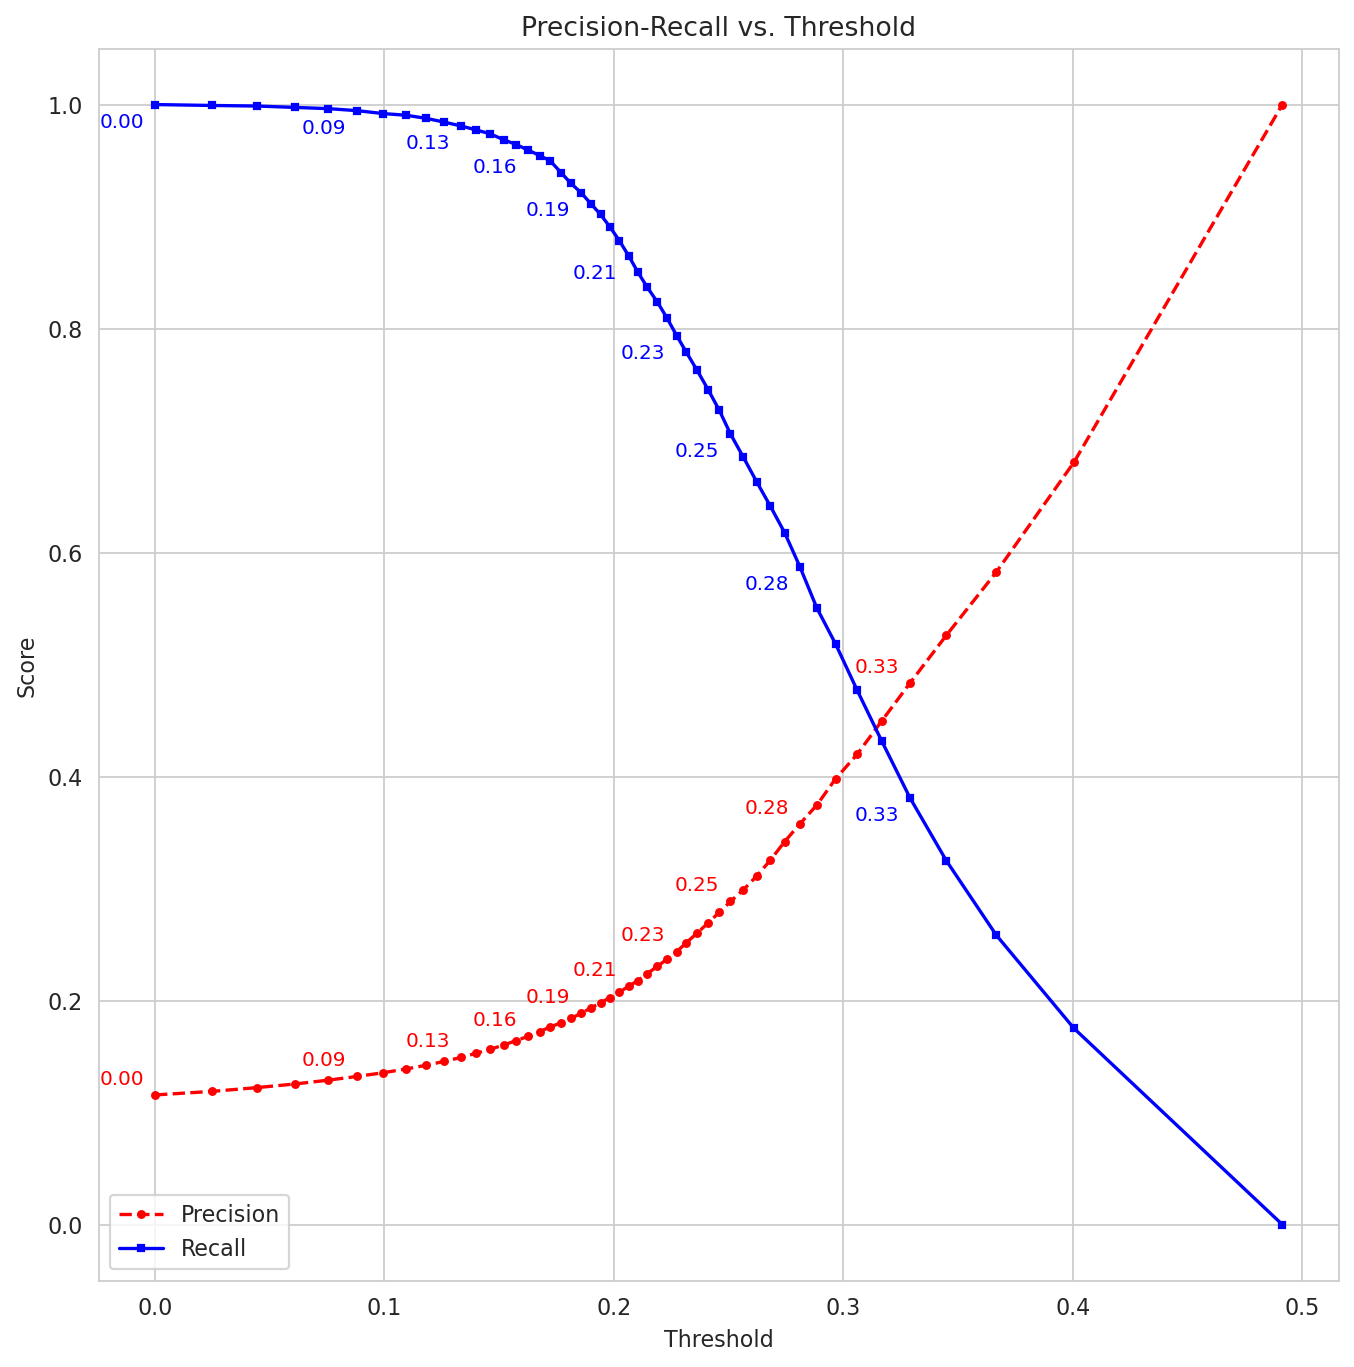

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(test_y, test_probs)

# Set plot style
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10), dpi=160)

# Sample fewer thresholds for faster computation
num_points = 50  # Reduce number of threshold calculations
threshold_idxs = np.linspace(0, len(thresholds) - 1, num_points, dtype=int)
sampled_thresholds = thresholds[threshold_idxs]

# Plot Precision and Recall vs. Threshold
plt.plot(sampled_thresholds, precision[threshold_idxs], label="Precision", linestyle='--', marker='o', markersize=3, color='red')
plt.plot(sampled_thresholds, recall[threshold_idxs], label="Recall", linestyle='-', marker='s', markersize=3, color='blue')

# Annotate selected threshold values
for i in range(0, len(sampled_thresholds), max(1, len(sampled_thresholds) // 10)):  # Avoid division by zero
    plt.annotate(f"{sampled_thresholds[i]:.2f}", 
                 (sampled_thresholds[i], precision[threshold_idxs[i]]), 
                 textcoords="offset points", 
                 xytext=(-5,5), 
                 ha='right', fontsize=9, color='red')
    
    plt.annotate(f"{sampled_thresholds[i]:.2f}", 
                 (sampled_thresholds[i], recall[threshold_idxs[i]]), 
                 textcoords="offset points", 
                 xytext=(-5,-10), 
                 ha='right', fontsize=9, color='blue')

# Labels and title
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()

# Show plot
plt.show()


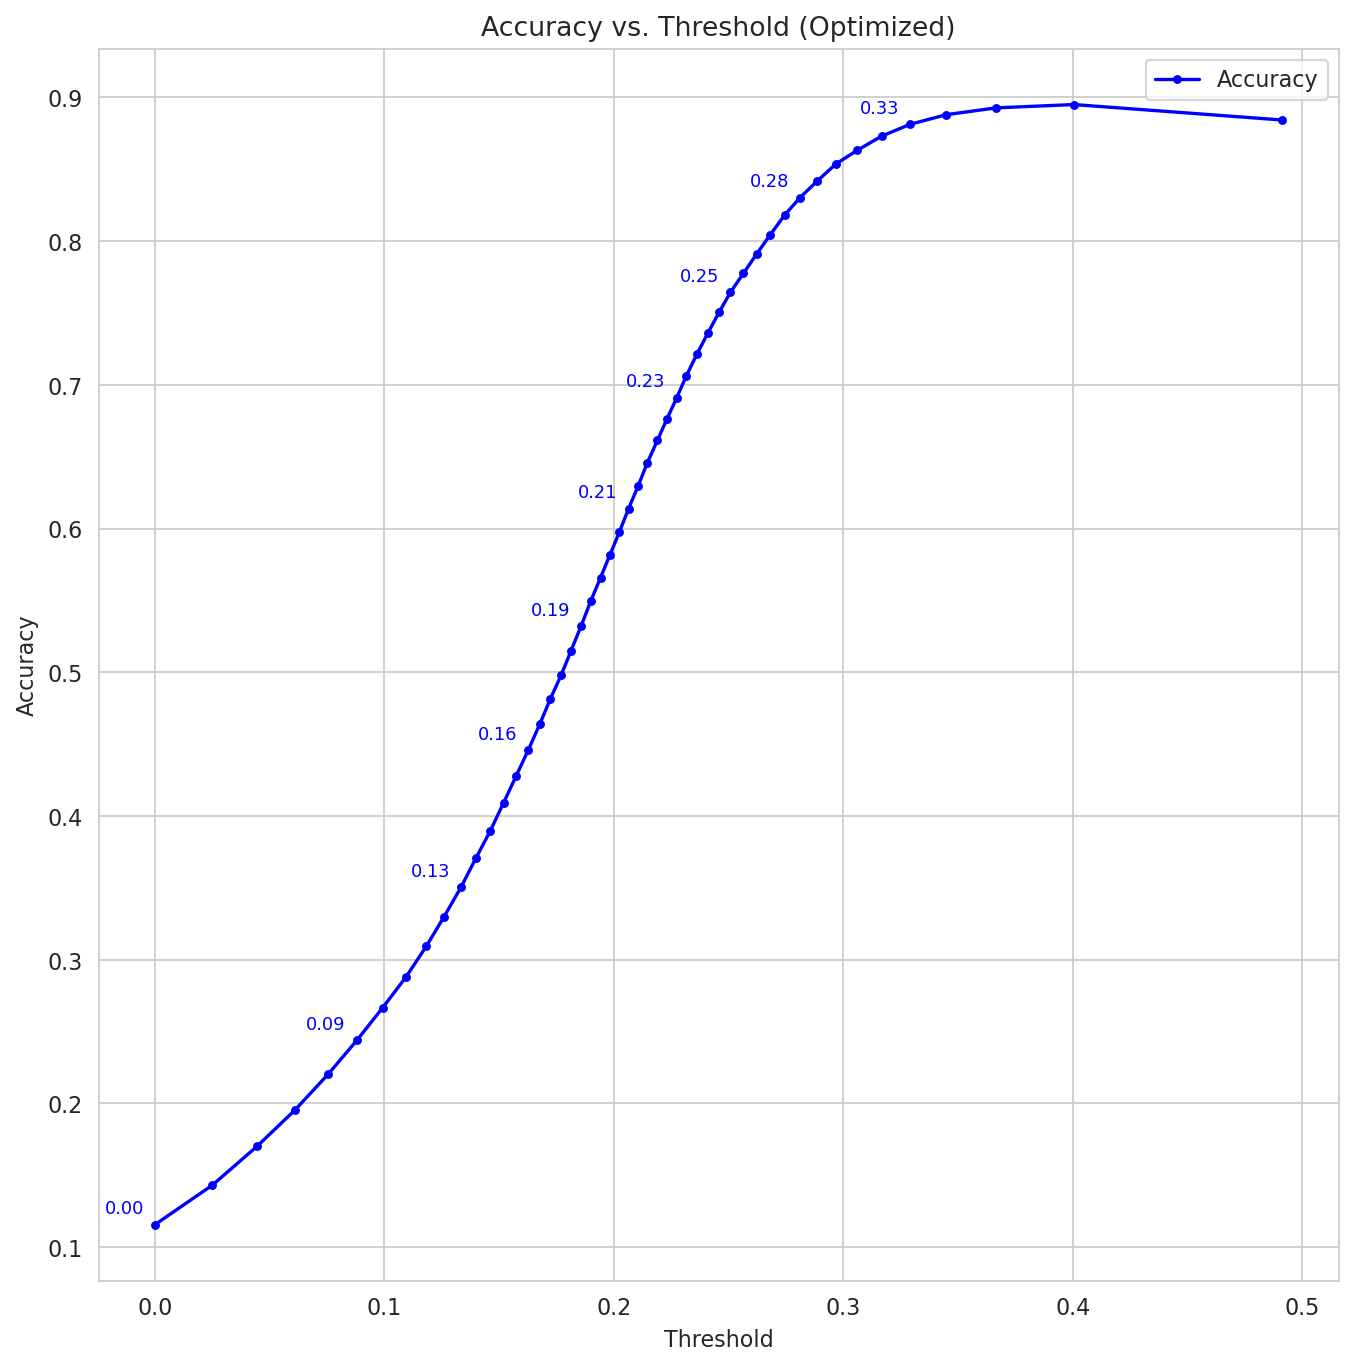

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_curve

# Compute precision-recall curve using test_y and test_probs
precision, recall, thresholds = precision_recall_curve(test_y, test_probs)

# Sample fewer thresholds for faster computation
num_points = 50  # Reduce number of threshold calculations
threshold_idxs = np.linspace(0, len(thresholds) - 1, num_points, dtype=int)
sampled_thresholds = thresholds[threshold_idxs]

# Compute accuracy at sampled thresholds using vectorized operations
y_pred_matrix = (test_probs[:, None] >= sampled_thresholds).astype(int)  # Matrix of predictions
accuracy_scores = np.mean(y_pred_matrix == test_y[:, None], axis=0)  # Compute accuracy for each threshold

# Plot Accuracy vs. Threshold with smaller markers
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10), dpi = 160)
plt.plot(sampled_thresholds, accuracy_scores, marker='o', linestyle='-', markersize=3, color='blue', label="Accuracy")

# Annotate selected threshold values
for i in range(0, len(sampled_thresholds), max(1, len(sampled_thresholds) // 10)):
    plt.annotate(f"{sampled_thresholds[i]:.2f}", 
                 (sampled_thresholds[i], accuracy_scores[i]), 
                 textcoords="offset points", 
                 xytext=(-5,5), 
                 ha='right', fontsize=8, color='blue')

# Labels and title
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Threshold (Optimized)")
plt.legend()

# Show plot
plt.show()


In [40]:
import torch

torch.save(model.state_dict(), "sageconv.pth")


## See Probs for Entire Dataset

## SHAP scores on GNN